In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from tqdm import tqdm
from mlp import MLP

In [2]:

df = load_digits()
X = df.data
Y = df.target
Y = np.eye(10)[Y]

# print(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

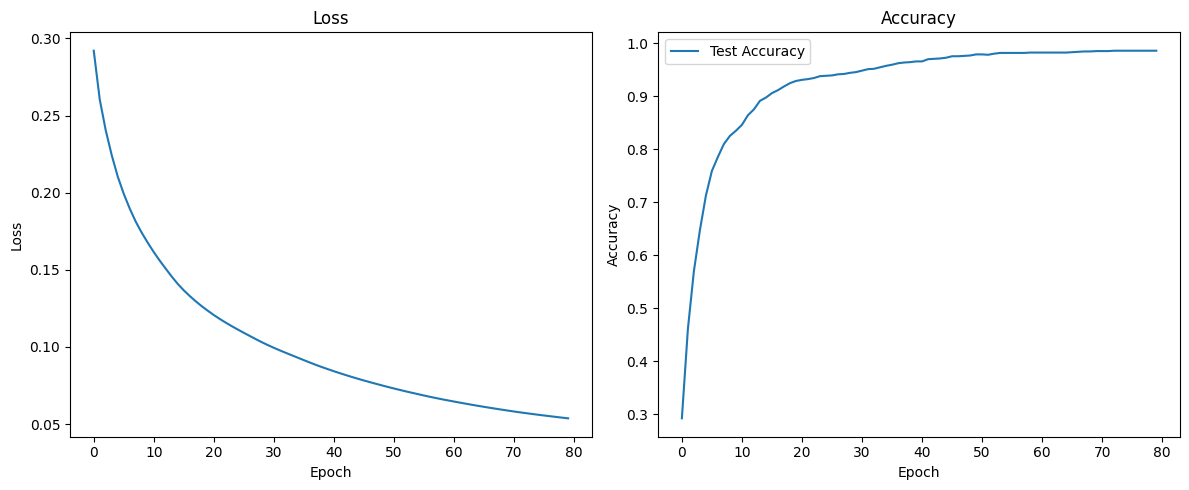

In [3]:
epochs = 80
model = MLP(.001,epochs,X_train.shape[1],[128, 32], y_train.shape[1])
model.train(X_train, y_train)

In [4]:
model.evaluate(X_test, y_test)

(0.8944444444444445, 0.12363256726696611)

In [5]:
model.precision_recall(y_test,10)

{'Precision': 0.010833333333333334, 'Recall': 0.1}

# OneHot Encoding and Decoding

In [6]:
def onehot_encode(data):
    if not isinstance(data, list):
        data = data.tolist()

    num_classes = max(data) + 1
    onehot_result = [[1 if i == j else 0 for j in range(num_classes)] for i in data]
    
    return onehot_result

def onehot_decode(data):
    decoded = [i for row in data for i in range(len(row)) if row[i] == 1]
    return decoded

myarray = [1,5,3, 8, 6, 0]

encoded_array = onehot_encode(myarray)
print(encoded_array)

onehot_decode(encoded_array)

[[0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0]]


[1, 5, 3, 8, 6, 0]

In [7]:
import cv2

img = cv2.imread('input/seven.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img.reshape(64,1)

x = img
np.argmax(model.forward(x))